# Import Libraries 

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import mode
from sklearn import metrics

%matplotlib inline

# Visualize Data

In [176]:
df = pd.read_csv('Cardio22.csv');
df

,Age,Gender,Exang,Weight,Trestbps,Thalac,Cholesterol,FastingBS,Slope,Chestpain,RestingECG,Thal,Cardio
0,63,1,0,67.0,145,150,233,1,0,3,0,1,1
1,37,1,0,70.0,145,187,250,0,0,2,1,2,1
2,41,0,0,61.0,145,172,204,0,2,1,0,2,1
3,56,1,0,64.0,145,178,236,0,2,1,1,2,1
4,57,0,1,65.0,145,163,354,0,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,56,1,0,82.0,155,99,0,0,2,3,1,3,1
995,56,1,0,83.4,120,148,0,0,2,4,1,2,1
996,56,1,0,72.0,120,97,0,0,2,3,0,1,0
997,64,0,1,78.0,200,140,0,0,2,4,0,3,1


In [177]:
df.describe()

,Age,Gender,Exang,Weight,Trestbps,Thalac,Cholesterol,FastingBS,Slope,Chestpain,RestingECG,Thal,Cardio
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,51.992993,0.696697,0.339339,70.019520,132.149149,143.604605,223.696697,0.196196,1.181181,1.625626,0.563564,1.847848,0.491491
std,9.303336,0.459915,0.473722,12.480175,18.272179,23.848193,84.169532,0.397318,0.728882,1.502831,0.744865,0.912435,0.500178
min,28.000000,0.000000,0.000000,37.500000,80.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,0.000000,0.000000,61.100000,120.000000,126.000000,197.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,52.000000,1.000000,0.000000,70.100000,130.000000,145.000000,230.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000
75%,59.000000,1.000000,1.000000,78.900000,140.000000,161.000000,268.000000,0.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,1.000000,120.000000,200.000000,202.000000,603.000000,1.000000,3.000000,4.000000,2.000000,7.000000,1.000000


# Check if any null value is in the data set or not

In [178]:
df.isnull().sum()

Age            0
Gender         0
Exang          0
Weight         0
Trestbps       0
Thalac         0
Cholesterol    0
FastingBS      0
Slope          0
Chestpain      0
RestingECG     0
Thal           0
Cardio         0
dtype: int64

# Visualize the relationship between the features and the response using scatterplots

Text(0.5, 1.0, 'Cardio Vascular Disease')

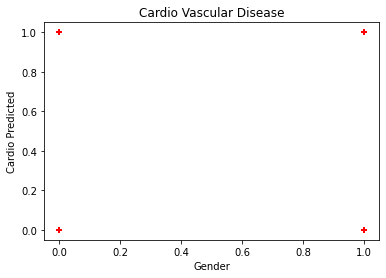

In [179]:
plt.scatter(df[['Gender']] , df[['Cardio']] , marker ='+' , color = 'red')
plt.xlabel('Gender')
plt.ylabel('Cardio Predicted')
plt.title('Cardio Vascular Disease')

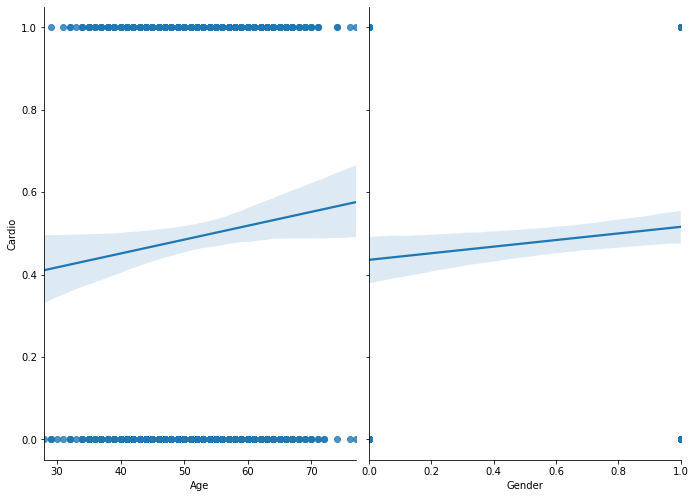

In [180]:
sns.pairplot(df, x_vars=['Age','Gender'], y_vars='Cardio', height=7, aspect=0.7, kind='reg')

# The basic features lies in x and the target result lies in y

In [181]:
x = df.drop(['Cardio'] , axis= 1)
y = df['Cardio']
y

0      1
1      1
2      1
3      1
4      1
      ..
994    1
995    1
996    0
997    1
998    1
Name: Cardio, Length: 999, dtype: int64

# Transform all the features of x using minmax scaler

In [182]:
MMS = MinMaxScaler(feature_range =(0, 1))

x_after_min_max_scaler = MMS.fit_transform(x)

x_after_min_max_scaler

array([[0.71428571, 1.        , 0.        , ..., 0.75      , 0.        ,
        0.14285714],
       [0.18367347, 1.        , 0.        , ..., 0.5       , 0.5       ,
        0.28571429],
       [0.26530612, 0.        , 0.        , ..., 0.25      , 0.        ,
        0.28571429],
       ...,
       [0.57142857, 1.        , 0.        , ..., 0.75      , 0.        ,
        0.14285714],
       [0.73469388, 0.        , 1.        , ..., 1.        , 0.        ,
        0.42857143],
       [0.67346939, 1.        , 1.        , ..., 1.        , 0.        ,
        0.42857143]])

# Split the dataset into train and test

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(x_after_min_max_scaler, y , random_state = 1, test_size = 0.3)

# Import and initialize KNN classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)

# Fit the model

In [120]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [121]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], d

In [122]:
knn.score(X_test , Y_test)

0.7666666666666667

In [123]:
metrics.accuracy_score(Y_test, y_pred)

0.7666666666666667

# Measure Performance metrix

In [124]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[124,  23],
       [ 47, 106]], dtype=int64)

In [125]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       147
           1       0.82      0.69      0.75       153

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [126]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

In [127]:
scores

[0.7533333333333333,
 0.7333333333333333,
 0.7433333333333333,
 0.7366666666666667,
 0.7733333333333333,
 0.7633333333333333,
 0.7566666666666667,
 0.73,
 0.7733333333333333,
 0.7666666666666667,
 0.7533333333333333,
 0.7466666666666667,
 0.7533333333333333,
 0.7466666666666667,
 0.76,
 0.7533333333333333,
 0.7733333333333333,
 0.7666666666666667,
 0.7633333333333333,
 0.7633333333333333,
 0.7733333333333333,
 0.76,
 0.7833333333333333,
 0.7533333333333333,
 0.7733333333333333]

Text(0, 0.5, 'Testing Accuracy')

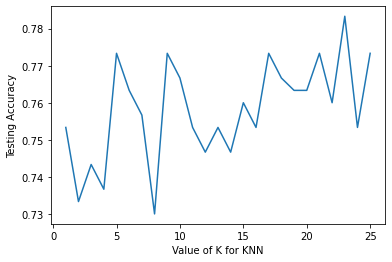

In [128]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [129]:
Y_test

507    1
608    1
452    0
368    1
242    0
      ..
459    1
415    1
61     1
347    1
349    1
Name: Cardio, Length: 300, dtype: int64

In [130]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], d

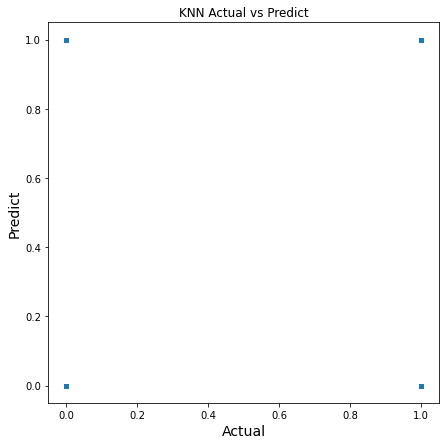

In [131]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test,y_pred,s=15)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predict',fontsize=14)
plt.title('KNN Actual vs Predict')
plt.show()

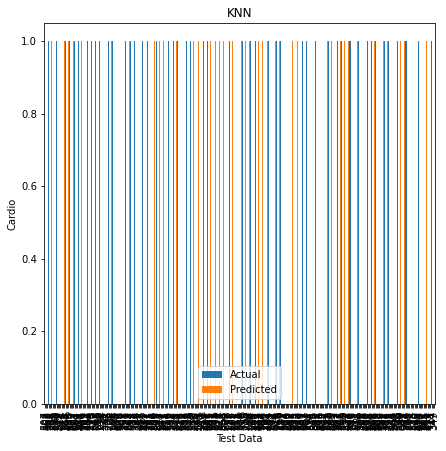

In [132]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.plot(kind='bar',figsize=(7,7),xlabel='Test Data',ylabel='Cardio',title='KNN')
plt.show()

# Import and initialize Logistic Regression classifier

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logreg = LogisticRegression(solver='liblinear')

# Fit the model

In [135]:
logreg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [136]:
y_pred = logreg.predict(X_test)

In [137]:
logreg.score(X_test , Y_test)

0.73

# Measure Performance metrix

In [183]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[119,  28],
       [ 40, 113]], dtype=int64)

Text(69.0, 0.5, 'Truth')

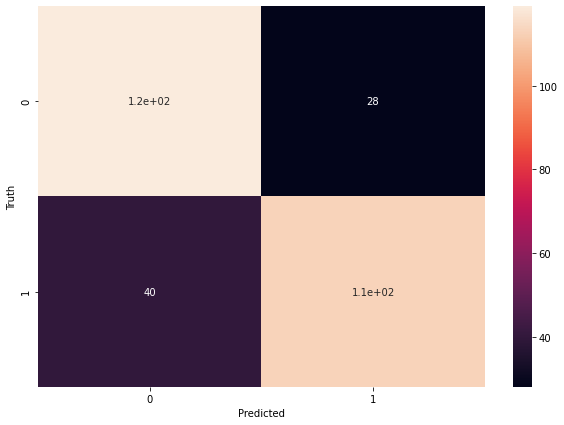

In [184]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [139]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       147
           1       0.74      0.73      0.73       153

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



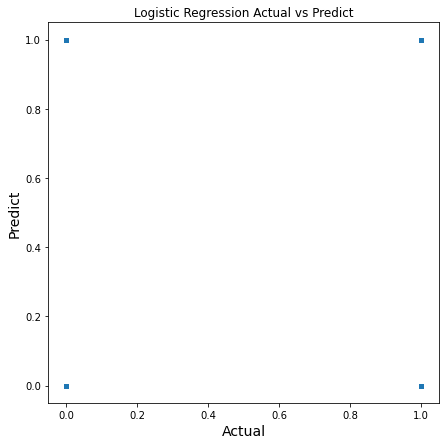

In [140]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test,y_pred,s=15)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predict',fontsize=14)
plt.title('Logistic Regression Actual vs Predict')
plt.show()

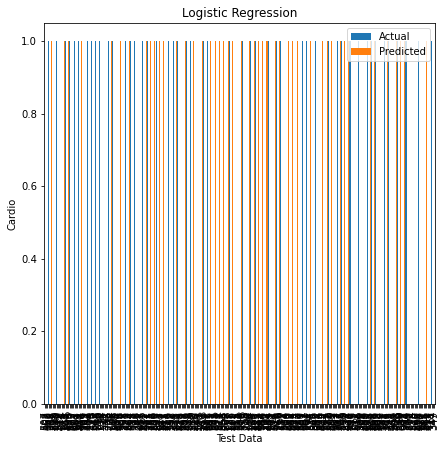

In [141]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.plot(kind='bar',figsize=(7,7),xlabel='Test Data',ylabel='Cardio',title='Logistic Regression')
plt.show()

# Import and initialize Gaussian Naive Bayes classifier

In [142]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fit the model

In [143]:
GNB.fit(X_train , Y_train)

GaussianNB()

In [144]:
y_pred = GNB.predict(X_test)

In [145]:
GNB.score(X_test , Y_test)

0.6933333333333334

# Measure Performance metrix

In [146]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[113,  34],
       [ 58,  95]], dtype=int64)

In [147]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       147
           1       0.74      0.62      0.67       153

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



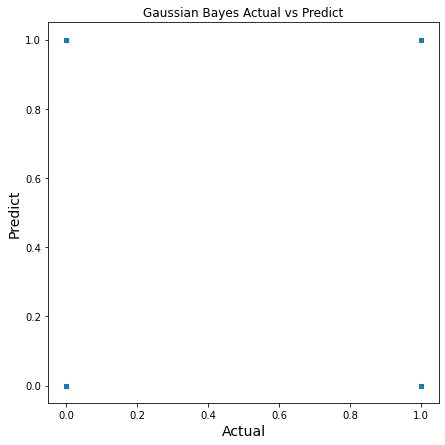

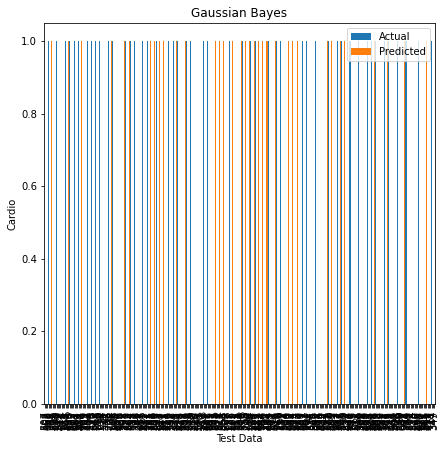

In [148]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test,y_pred,s=15)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predict',fontsize=14)
plt.title('Gaussian Bayes Actual vs Predict')
plt.show()
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.plot(kind='bar',figsize=(7,7),xlabel='Test Data',ylabel='Cardio',title='Gaussian Bayes')
plt.show()

In [149]:
from sklearn.svm import SVC
model = SVC()

In [150]:
model.fit(X_train, Y_train)

SVC()

In [151]:
model.score(X_test, Y_test)

0.7733333333333333

In [152]:
y_pred = model.predict(X_test)

# Measure Performance metrix

In [153]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[119,  28],
       [ 40, 113]], dtype=int64)

In [154]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       147
           1       0.80      0.74      0.77       153

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



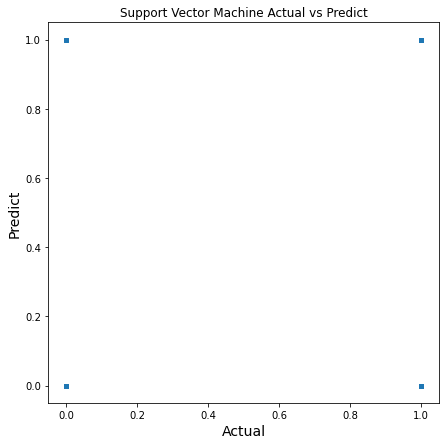

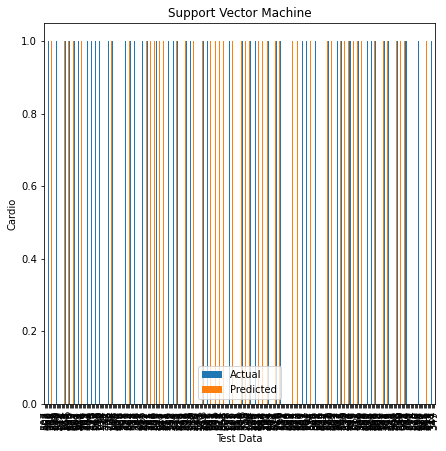

In [155]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test,y_pred,s=15)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predict',fontsize=14)
plt.title('Support Vector Machine Actual vs Predict')
plt.show()
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.plot(kind='bar',figsize=(7,7),xlabel='Test Data',ylabel='Cardio',title='Support Vector Machine')
plt.show()

# Import and initialize Random Forest classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

In [157]:
model.score(X_test , Y_test)

0.8233333333333334

In [158]:
y_predicted = model.predict(X_test)

# Measure Performance metrix

In [159]:
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[127,  20],
       [ 33, 120]], dtype=int64)

In [160]:
print(classification_report(Y_test , y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       147
           1       0.86      0.78      0.82       153

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



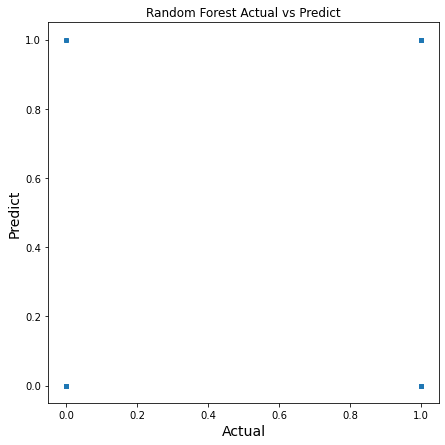

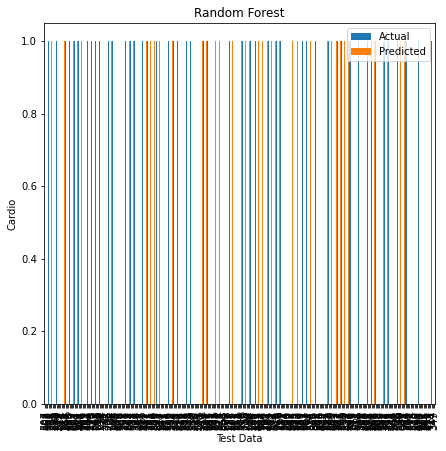

In [161]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test,y_predicted,s=15)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predict',fontsize=14)
plt.title('Random Forest Actual vs Predict')
plt.show()
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predicted})
df.plot(kind='bar',figsize=(7,7),xlabel='Test Data',ylabel='Cardio',title='Random Forest')
plt.show()

Text(69.0, 0.5, 'Truth')

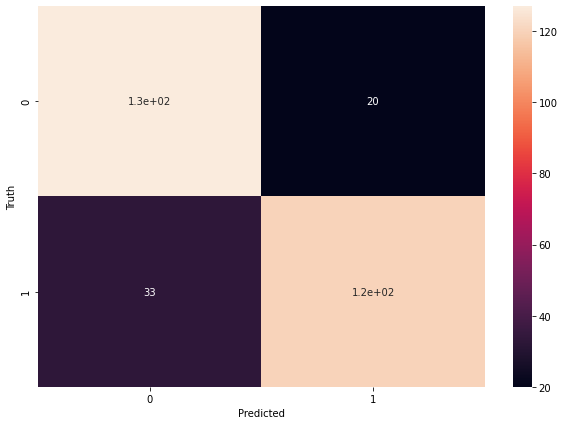

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Import and initialize Decision Tree classifier

In [163]:
from sklearn import tree

In [164]:
classify = tree.DecisionTreeClassifier()

# Fit the model

In [165]:
classify = classify.fit(X_train,Y_train)

In [166]:
predict = classify.predict(X_test)
predict

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], d

In [167]:
classify.score(X_test , Y_test)

0.7466666666666667

[Text(146.932734375, 208.38, 'X[11] <= 0.214\ngini = 0.499\nsamples = 699\nvalue = [361, 338]'),
 Text(61.903125, 190.26, 'X[2] <= 0.5\ngini = 0.257\nsamples = 291\nvalue = [247, 44]'),
 Text(33.13125, 172.14, 'X[9] <= 0.375\ngini = 0.159\nsamples = 229\nvalue = [209, 20]'),
 Text(16.0425, 154.01999999999998, 'X[5] <= 0.313\ngini = 0.296\nsamples = 94\nvalue = [77, 17]'),
 Text(5.58, 135.89999999999998, 'X[3] <= 0.387\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(2.79, 117.77999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(8.370000000000001, 117.77999999999999, 'X[11] <= 0.071\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(5.58, 99.66, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.16, 99.66, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(26.505, 135.89999999999998, 'X[4] <= 0.433\ngini = 0.242\nsamples = 85\nvalue = [73, 12]'),
 Text(19.53, 117.77999999999999, 'X[6] <= 0.537\ngini = 0.122\nsamples = 46\nvalue = [43, 3]'),
 Text(16.740000000000002, 99.

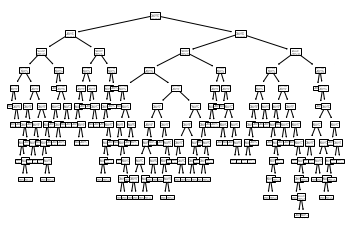

In [168]:
tree.plot_tree(classify)

# Measure Performance metrix

In [169]:
cm = confusion_matrix(Y_test, predict)
cm

array([[110,  37],
       [ 39, 114]], dtype=int64)

In [170]:
print(classification_report(Y_test ,predict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       147
           1       0.75      0.75      0.75       153

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



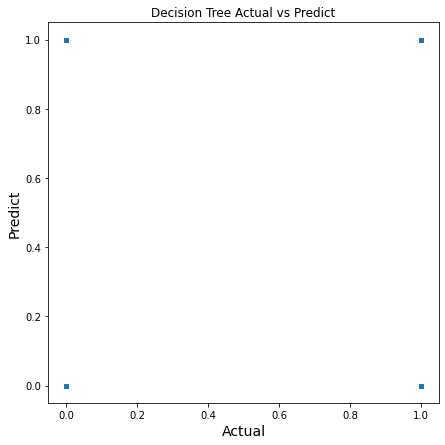

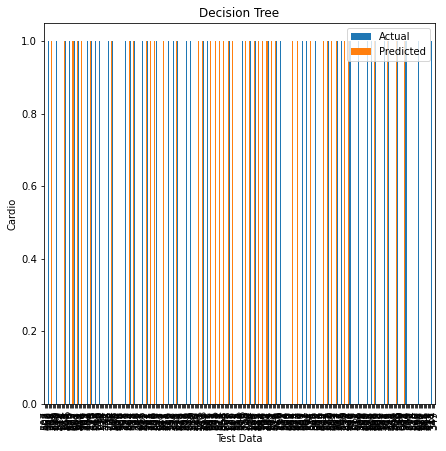

In [171]:
plt.figure(figsize=(7,7))
plt.scatter(Y_test,predict,s=15)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predict',fontsize=14)
plt.title('Decision Tree Actual vs Predict')
plt.show()
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df.plot(kind='bar',figsize=(7,7),xlabel='Test Data',ylabel='Cardio',title='Decision Tree')
plt.show()

Text(69.0, 0.5, 'Truth')

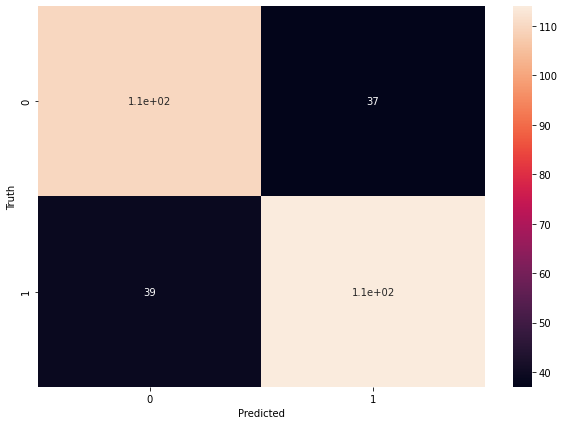

In [172]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')